# TOPIC MODELLING

## DATA IMPORT AND PREVIEW

In [2]:
# Importing pandas library, reading a CSV file, and displaying the first 20 rows

import pandas as pd
file ="C:\\Users\\Dell\\Downloads\\tripadvisor_hotel_reviews.csv"
df = pd.read_csv(file)
df.head(20)

Review  Rating
0   nice hotel expensive parking got good deal sta...       4
1   ok nothing special charge diamond member hilto...       2
2   nice rooms not 4* experience hotel monaco seat...       3
3   unique, great stay, wonderful time hotel monac...       5
4   great stay great stay, went seahawk game aweso...       5
5   love monaco staff husband stayed hotel crazy w...       5
6   cozy stay rainy city, husband spent 7 nights m...       5
7   excellent staff, housekeeping quality hotel ch...       4
8   hotel stayed hotel monaco cruise, rooms genero...       5
9   excellent stayed hotel monaco past w/e delight...       5
10  poor value stayed monaco seattle july, nice ho...       2
11  nice value seattle stayed 4 nights late 2007. ...       4
12  nice hotel good location hotel kimpton design ...       4
13  nice hotel not nice staff hotel lovely staff q...       3
14  great hotel night quick business trip, loved l...       4
15  horrible customer service hotel stay february ...       1
16  disappointed say anticipating stay hotel monac...       2
17  fantastic stay monaco seattle hotel monaco hol...       5
18  good choice hotel recommended sister, great lo...       5
19  hmmmmm say really high hopes hotel monaco chos...       3

## PRINTING TEXT PREVIEW

In [3]:
# Printing the first 400 characters of the text column for specific rows using iloc

print(repr(df.iloc[2666]["Review"][0:400]))
print(repr(df.iloc[4726]["Review"][0:400]))



"wo n't 2 couples excited stay expecting quiet beach resort vacation arrived lobby conventioneers beach pool relatively uninviting, little warm welcoming hotel, rooms overlooked cement wall, staff desk try helpful changing rooms disappear 15-20 minutes time closed door return answer come later, wasted entirely time trying rooms changed, finally 2 nights checked went ponce hilton wonderful, beds bes"
'new years berlin wonderful hotel stayed nights berlin hilton new year holiday girlfriend, hotel placed city blocks brandenberg gate reichstag, like high end shopping love staying here.the rooms comfortable, staying points entitled room upgrade free breakfast, no upgraded room arrived new year eve place placed regular room, room normal european standards small american bed comfortable design room e'


## TEXT PREPROCESSING

In [4]:
# Importing re module, splitting 'text' column into paragraphs, and counting number of paragraphs in each row

import re
df["paragraphs"] = df["Review"].map(lambda text: re.split('\\.\\s*\\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## TF-IDF VECTORIZATION

In [5]:
# Creating a TF-IDF vectorizer with specified parameters and transforming the text data

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

# Use the list of stop words with the TfidfVectorizer
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['Review'])
print(tfidf_text_vectors.shape)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(20491, 14041)


## DATAFRAME CREATION

In [6]:
# Creating a DataFrame 'paragraph_df' from the 'paragraphs' column of the original DataFrame 'df', 
# associating each paragraph with its corresponding year

paragraph_df = pd.DataFrame([{ "Review": paragraph, "Rating": year } 
                               for paragraphs, year in zip(df["paragraphs"], df["Rating"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5
5  love monaco staff husband stayed hotel crazy w...       5
6  cozy stay rainy city, husband spent 7 nights m...       5
7  excellent staff, housekeeping quality hotel ch...       4
8  hotel stayed hotel monaco cruise, rooms genero...       5
9  excellent stayed hotel monaco past w/e delight...       5

## TF-IDF VECTORIZATION FOR PARAGRAPHS

In [7]:
# Creating a TF-IDF vectorizer for paragraphs with specified parameters and transforming the text data

tfidf_para_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["Review"])
print(tfidf_para_vectors.shape)

(20491, 14039)


## NMF MODEL FITTING FOR TEXT DATA

In [8]:
# Creating an NMF model with 10 components and fitting it to TF-IDF vectors of text data, then obtaining the factorized matrices

from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## TOPIC DISPLAY FUNCTION DEFINITION

In [9]:
# Defining a function to display the top words for each topic based on the NMF model components and feature names

def display_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]]*100.0/total)))

# Assuming tfidf_para_vectorizer is your TfidfVectorizer and is already fitted
feature_names = tfidf_para_vectorizer.get_feature_names_out()

# Call the function with the NMF model and the feature names
display_topics(nmf_text_model, feature_names)


Topic 00
  staffing (2.12)
  stays (1.94)
  hen (1.77)
  frig (1.65)
  wonderfully (1.47)

Topic 01
  resources (1.63)
  beach (1.52)
  foodthe (0.87)
  poorest (0.75)
  beautiful (0.54)

Topic 02
  tolerate (0.57)
  desperately (0.55)
  gounds (0.54)
  timers (0.53)
  roommate (0.51)

Topic 03
  goodwood (8.35)
  valve (2.84)
  locks (2.25)
  breakfasted (1.70)
  cleaned (1.69)

Topic 04
  greece (17.53)
  locks (5.47)
  roomthe (1.30)
  staffing (1.28)
  plan (1.27)

Topic 05
  walked (1.57)
  stations (1.39)
  civic (1.00)
  mexican (0.89)
  trains (0.83)

Topic 06
  serviced (2.95)
  excels (1.76)
  best (0.92)
  hotspots (0.80)
  starck (0.70)

Topic 07
  nickel (13.27)
  roomthe (1.57)
  livid (1.04)
  area (1.04)
  plan (1.01)

Topic 08
  roommate (3.83)
  bed (1.30)
  bathroom (1.14)
  flop (1.06)
  viewed (0.93)

Topic 09
  sandro (2.08)
  parrots (1.60)
  jug (1.32)
  carabela (1.22)
  franklin (0.97)


## NMF MODEL FITTING FOR PARAGRAPHS

In [10]:
# Creating an NMF model for paragraphs, fitting it to TF-IDF vectors of paragraphs, then displaying the top words for each topic

nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_text_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_text_model.components_
display_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  did (1.01)
  time (0.56)
  just (0.55)
  got (0.55)
  told (0.50)

Topic 01
  resort (1.74)
  beach (1.62)
  food (0.91)
  pool (0.79)
  beautiful (0.58)

Topic 02
  great (17.08)
  location (5.28)
  staff (1.27)
  place (1.26)
  rooms (1.24)

Topic 03
  walk (1.56)
  station (1.37)
  city (0.99)
  metro (0.88)
  train (0.82)

Topic 04
  nice (12.62)
  really (1.97)
  rooms (1.44)
  little (1.05)
  area (1.05)

Topic 05
  good (8.24)
  value (2.83)
  location (2.27)
  breakfast (1.72)
  clean (1.68)

Topic 06
  san (2.07)
  parking (1.61)
  juan (1.31)
  car (1.22)
  francisco (0.97)

Topic 07
  room (4.03)
  bed (1.30)
  bathroom (1.12)
  floor (1.07)
  view (0.92)

Topic 08
  staff (2.08)
  stay (1.85)
  helpful (1.70)
  friendly (1.59)
  wonderful (1.43)

Topic 09
  service (2.94)
  excellent (1.06)
  best (0.85)
  hotels (0.83)
  star (0.76)


## TOPIC CONTRIBUTION CALCULATION

In [11]:
# Calculating the percentage contribution of each topic in the text data

W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 9.39881173, 11.25335559, 14.1754201 , 10.26372066, 10.50784288,
        9.29553852,  9.87217773,  7.68958838, 10.67132518,  6.87221922])

In [12]:
# Calculating the percentage contribution of each topic in the paragraph data

W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([10.37014513, 11.0107481 , 10.75280025, 10.31470956,  8.55327728,
        9.04372381,  6.70867219, 11.71567013, 11.97706167,  9.55319189])

## COUNT VECTORIZATION

In [13]:
# Converts spaCy stop words to a list and initializes a CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stop words to a list

stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["Review"])
count_para_vectors.shape

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(20491, 14041)

## LDA MODEL FITTING

In [26]:
# Fits the LDA model to the count vectors of paragraph data

from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

## TOPIC DISPLAY FUNCTION

In [27]:
# Takes the LDA model (model), the vectorizer used to generate features

def display_topics(model, vectorizer, no_top_words=5):
    feature_names = vectorizer.get_feature_names_out()
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

display_topics(lda_para_model, count_para_vectorizer)


Topic 00
  great (4.23)
  staff (2.72)
  stay (2.62)
  location (2.50)
  good (1.87)

Topic 01
  service (1.95)
  great (1.26)
  room (1.15)
  pool (0.95)
  staff (0.87)

Topic 02
  room (3.41)
  nice (1.15)
  great (1.08)
  bed (0.88)
  stay (0.80)

Topic 03
  room (3.54)
  good (1.16)
  rooms (1.06)
  night (1.01)
  stay (0.95)

Topic 04
  beach (2.00)
  resort (1.59)
  food (1.26)
  great (1.13)
  good (1.12)

Topic 05
  room (2.82)
  stay (1.39)
  night (1.15)
  booked (0.96)
  staff (0.77)

Topic 06
  room (2.33)
  service (0.90)
  day (0.88)
  told (0.77)
  desk (0.75)

Topic 07
  staff (2.17)
  stay (1.89)
  wonderful (1.45)
  time (1.16)
  great (1.13)

Topic 08
  room (2.53)
  good (1.30)
  breakfast (0.84)
  night (0.79)
  station (0.75)

Topic 09
  room (1.94)
  great (1.80)
  location (1.64)
  breakfast (1.45)
  good (1.44)


## TOPIC DISTRIBUTION CALCULATION

In [28]:
# Calculates the percentage distribution of topics across paragraphs.

W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([12.76527424,  6.87742312, 11.15339829, 10.20485149, 14.36536903,
        3.34246995,  9.14265507,  8.00025556,  8.56569793, 15.58260532])

## WORDCLOUD GENERATION

In [29]:
# Generates word clouds for each topic in a given topic model.

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

C:\Users\Dell\AppData\Local\Temp\ipykernel_2360\4081123732.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## WORDCLOUD GENERATION

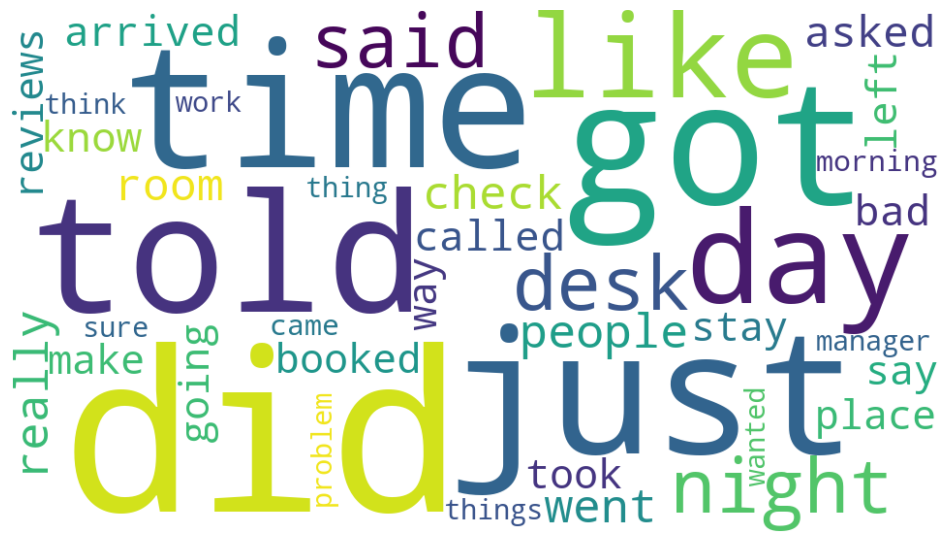

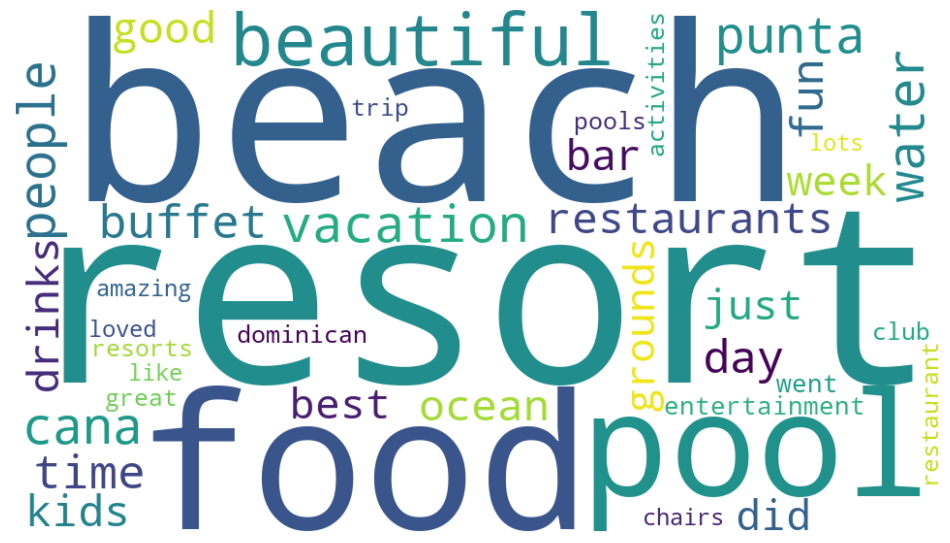

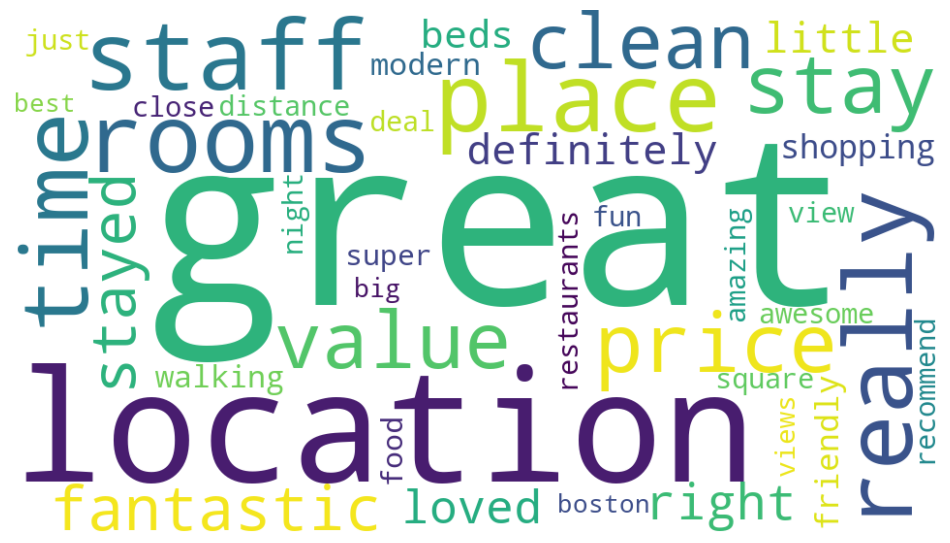

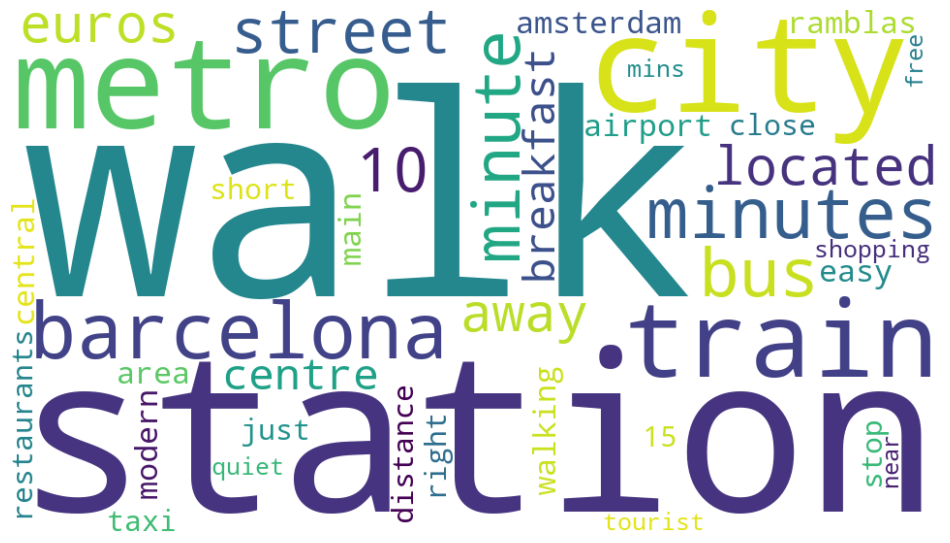

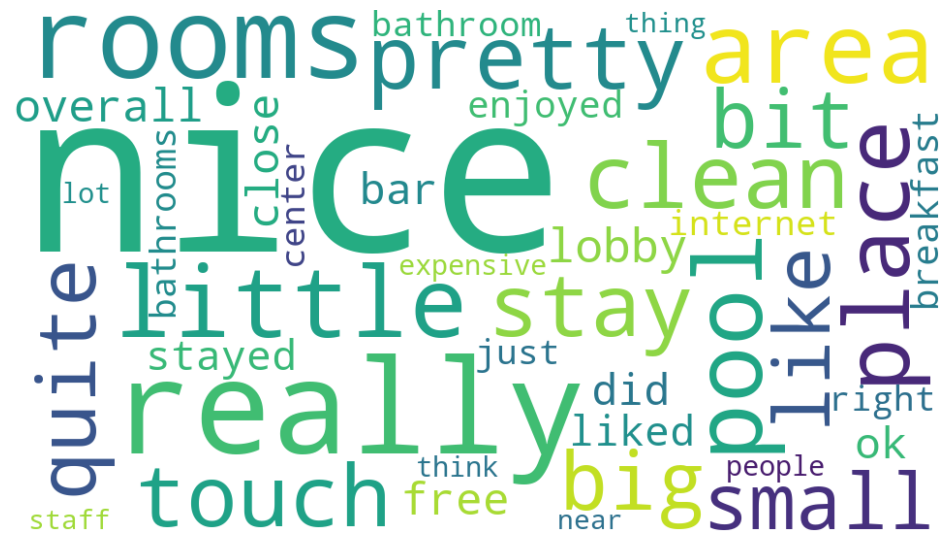

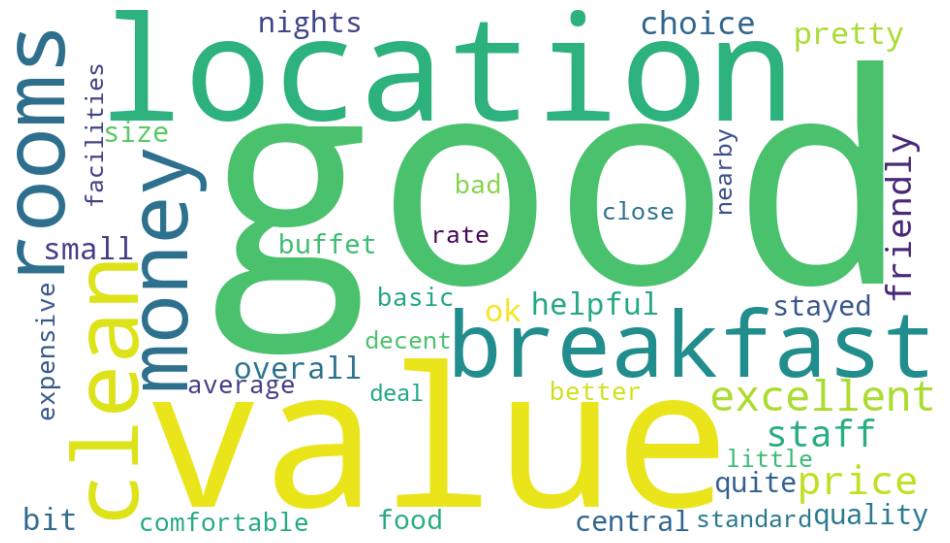

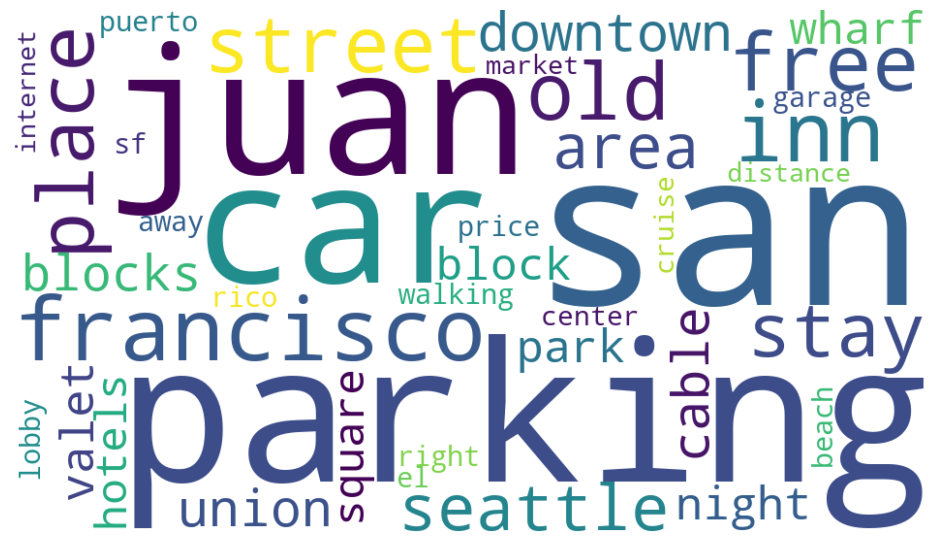

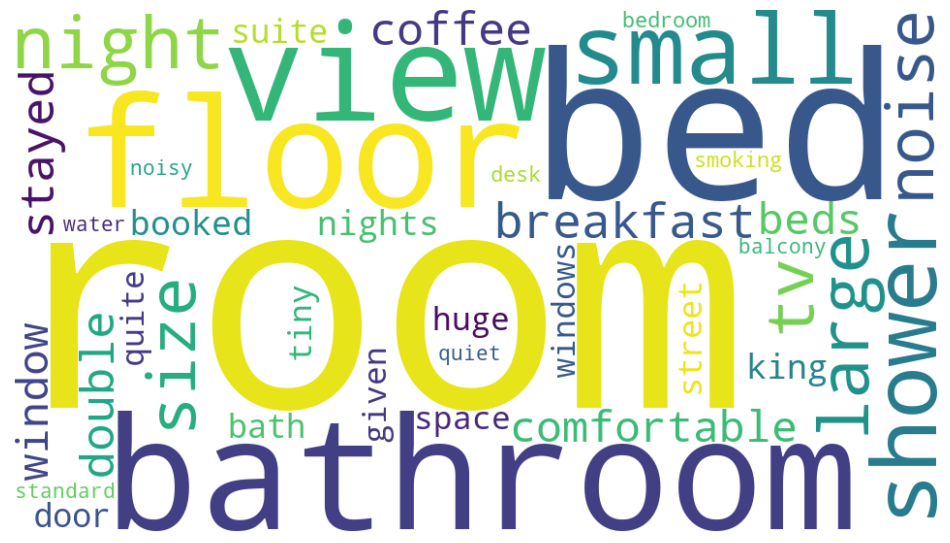

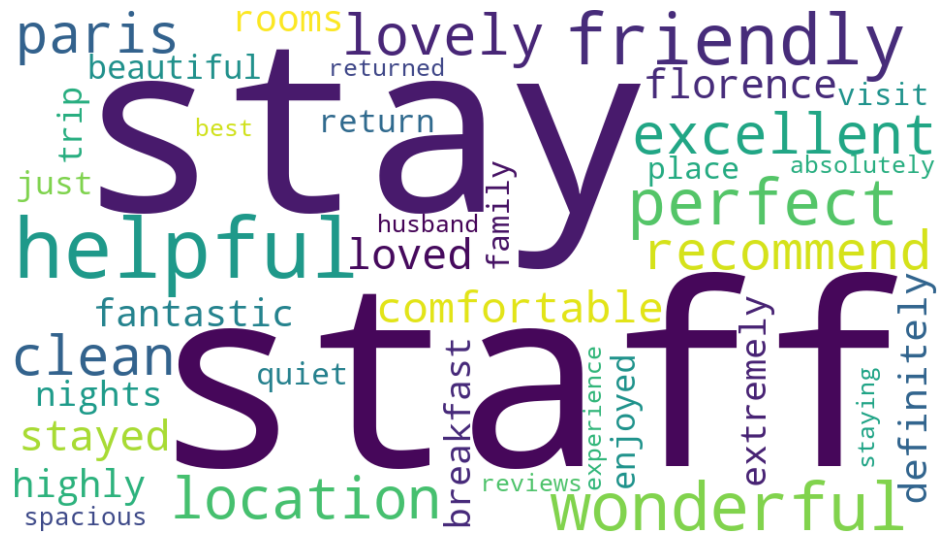

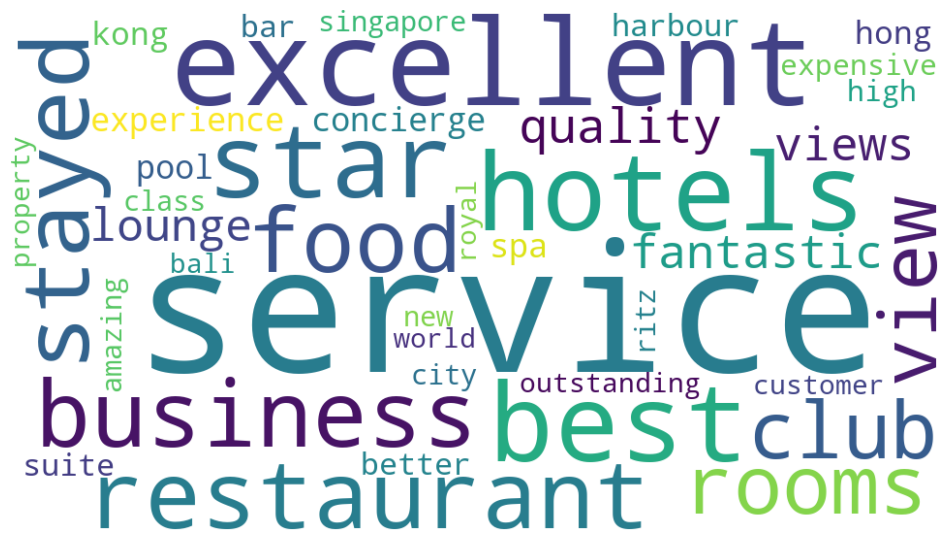

In [30]:
# Iterates over each topic in the model, retrieves the top words and their frequencies, and generates a word cloud based

wordcloud_topics(nmf_text_model, tfidf_para_vectorizer.get_feature_names_out())

## WORDCLOUD GENERATION FOR LDA PARA MODEL

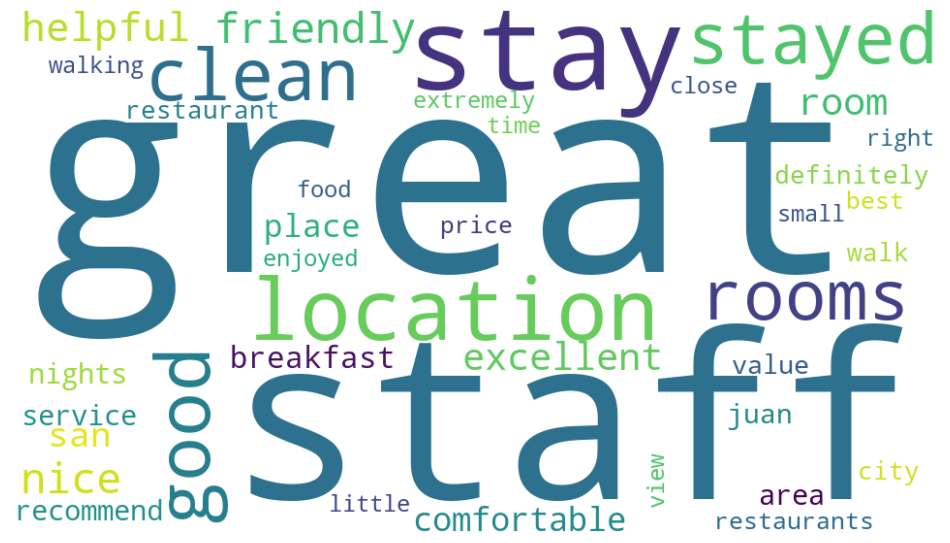

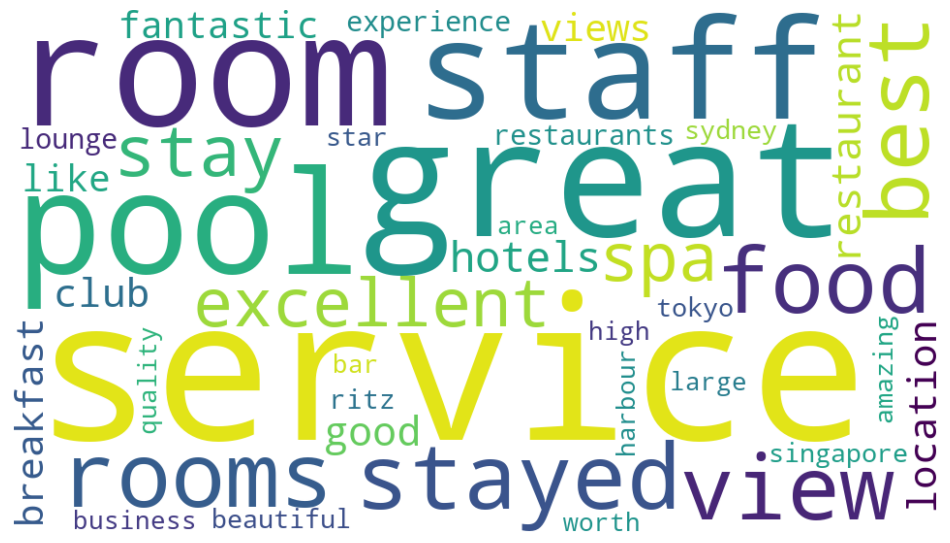

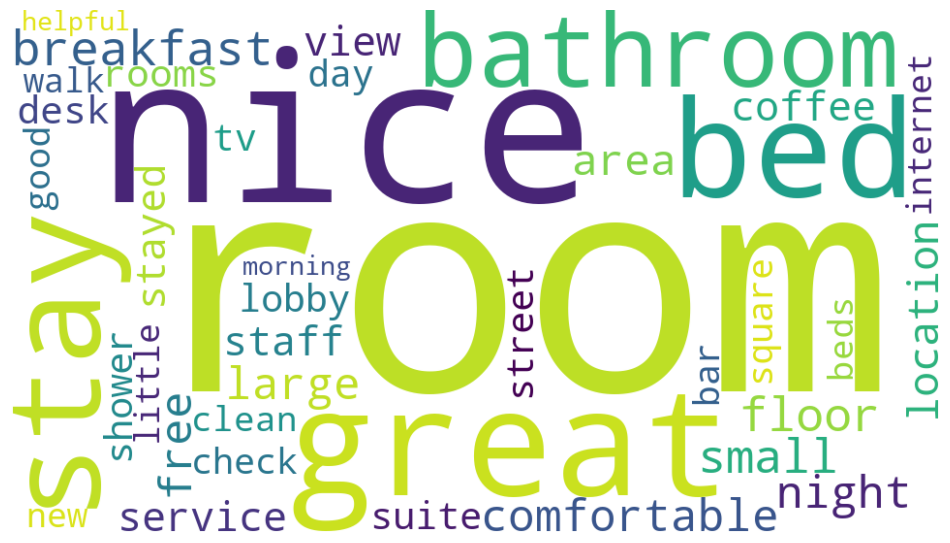

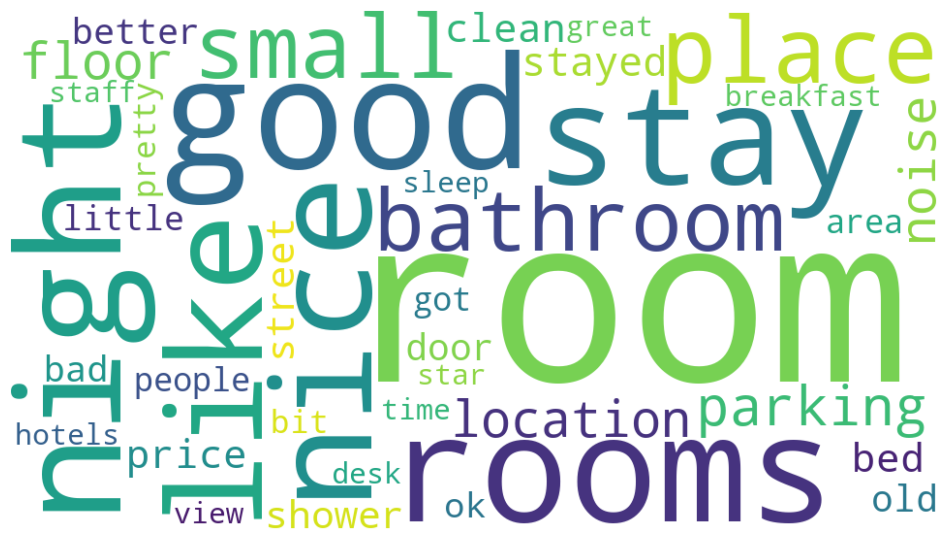

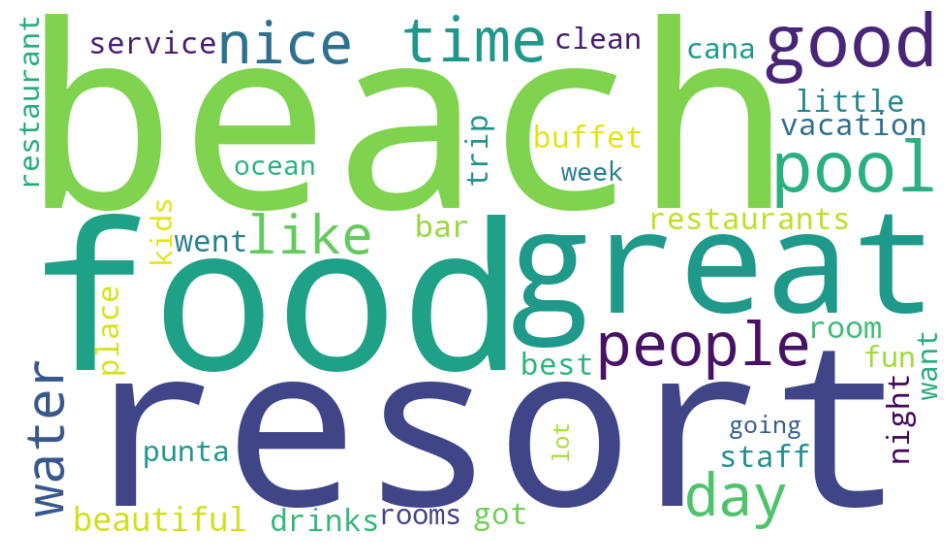

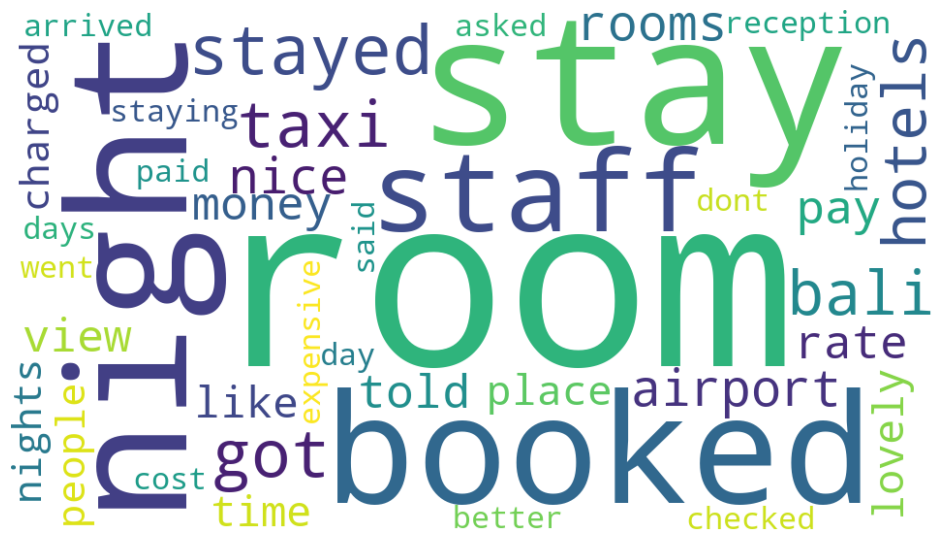

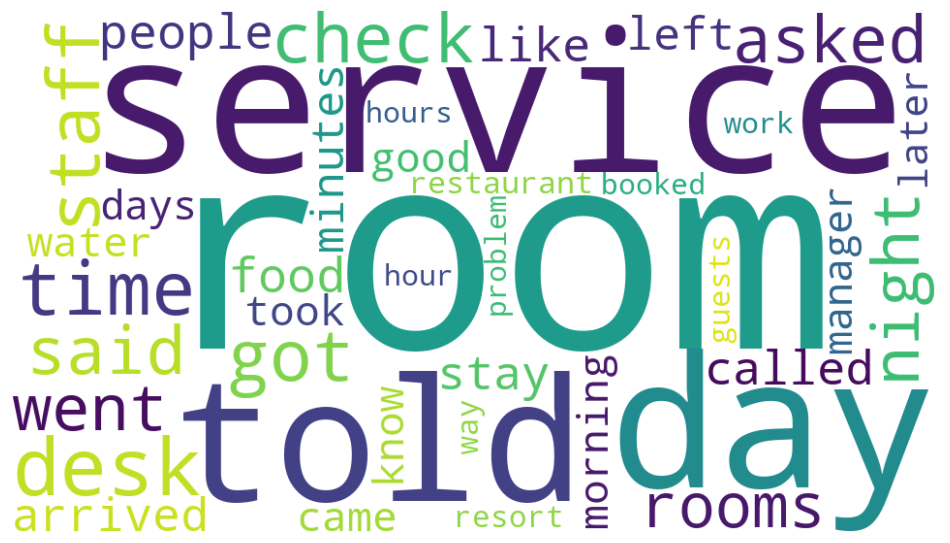

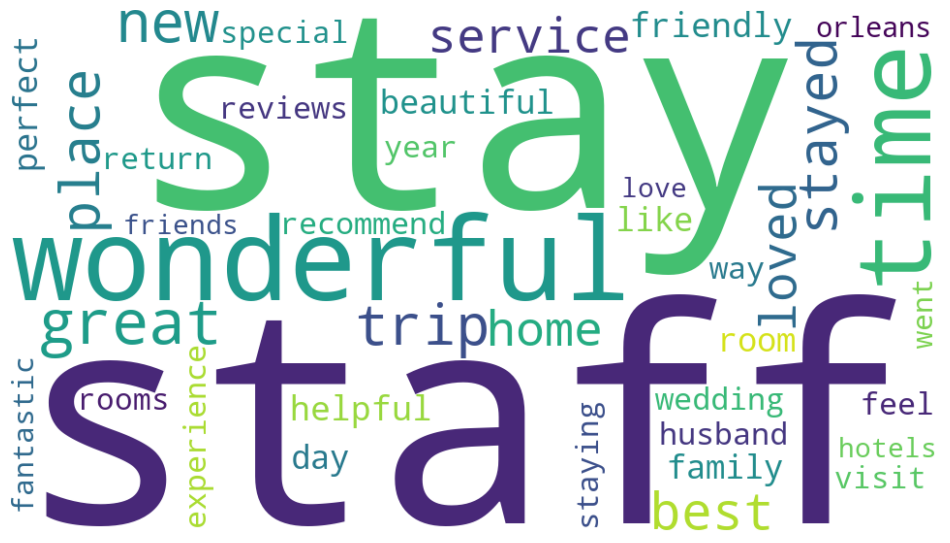

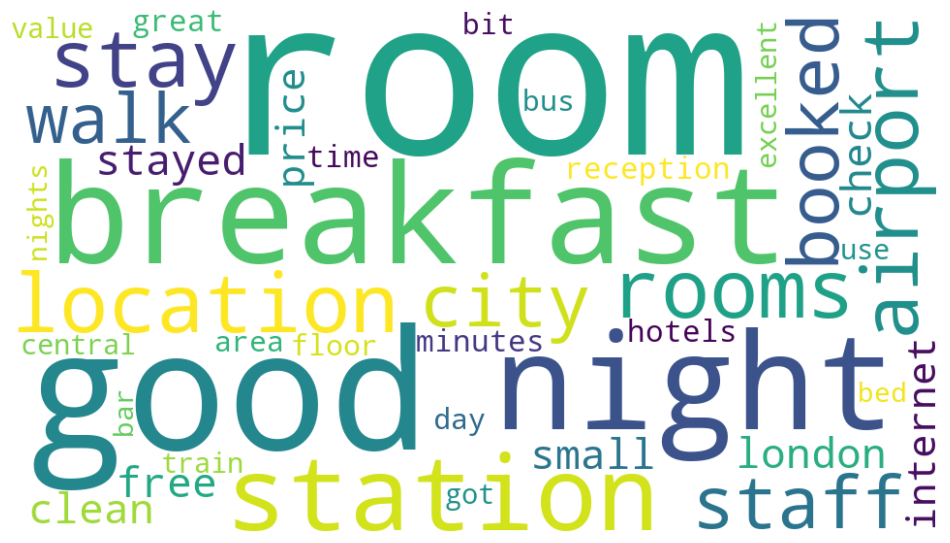

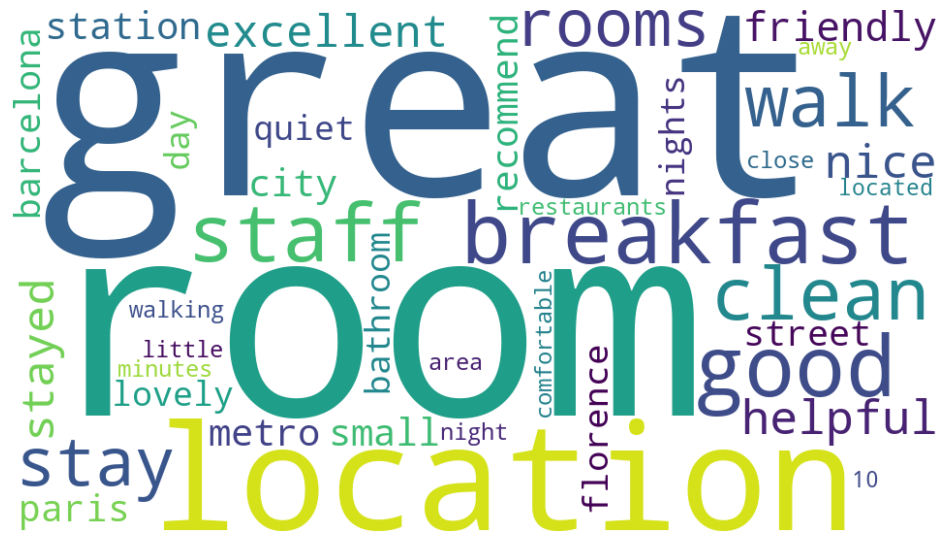

In [31]:
# Wordcloud using matplotlib.pyplot, with customization for the appearance and size.

wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())

## TOPIC NAMES GENERATION

In [32]:
# Topic names for NMF Model

topic_names = []
voc = tfidf_para_vectorizer.vocabulary_
for topic in nmf_text_model.components_:
    important = topic.argsort()
    top_word = [word for word, index in voc.items() if index == important[-1]][0] + " " + [word for word, index in voc.items() if index == important[-2]][0]
    topic_names.append("Topic " + top_word)

## TOPIC NAMES GENERATION FOR NMF MODEL

In [33]:
print(paragraph_df.columns)


Index(['Review', 'Rating'], dtype='object')


In [34]:
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming paragraph_df is your DataFrame and it has a 'text' and 'Rating' column
# Ensure 'nmf_Rating_model' and 'tfidf_para_vectors' are defined prior to this snippet

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Transform 'text' column to TF-IDF vectors
tfidf_para_vectors = tfidf_vectorizer.fit_transform(paragraph_df['Review'])

# Initialize NMF model
nmf_Rating_model = NMF(n_components=5, random_state=42)

# Fit NMF model on the TF-IDF vectors (this step might be redundant if 'nmf_Rating_model' is already trained)
W_matrix = nmf_Rating_model.fit_transform(tfidf_para_vectors)

# Analyze text data by 'Rating'
Rating_data = []
unique_Ratings = np.unique(paragraph_df["Rating"])

for Rating in tqdm(unique_Ratings):
    # Select TF-IDF vectors based on 'Rating'
    indices = np.array(paragraph_df["Rating"] == Rating)
    W_Rating = nmf_Rating_model.transform(tfidf_para_vectors[indices])
    
    # Calculate and append the topic distribution for this 'Rating'
    topic_distribution = list(W_Rating.sum(axis=0) / W_Rating.sum() * 100.0)
    Rating_data.append([Rating] + topic_distribution)


  0%|          | 0/5 [00:00<?, ?it/s]

In [35]:
# Generates topic names for topics in an NMF model based on their top words

from tqdm.auto import tqdm
import numpy as np
Rating_data = []
for Rating in tqdm(np.unique(np.unique(paragraph_df["Rating"]))):
    W_Rating = nmf_Rating_model.transform(tfidf_para_vectors[np.array(paragraph_df["Rating"] == Rating)])
    Rating_data.append([Rating] + list(W_Rating.sum(axis=0)/W_Rating.sum()*100.0))

  0%|          | 0/5 [00:00<?, ?it/s]

## DISTRIBUTION VISUALIZATION

In [36]:
topic_names = ["Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5"]


<Axes: xlabel='Rating'>

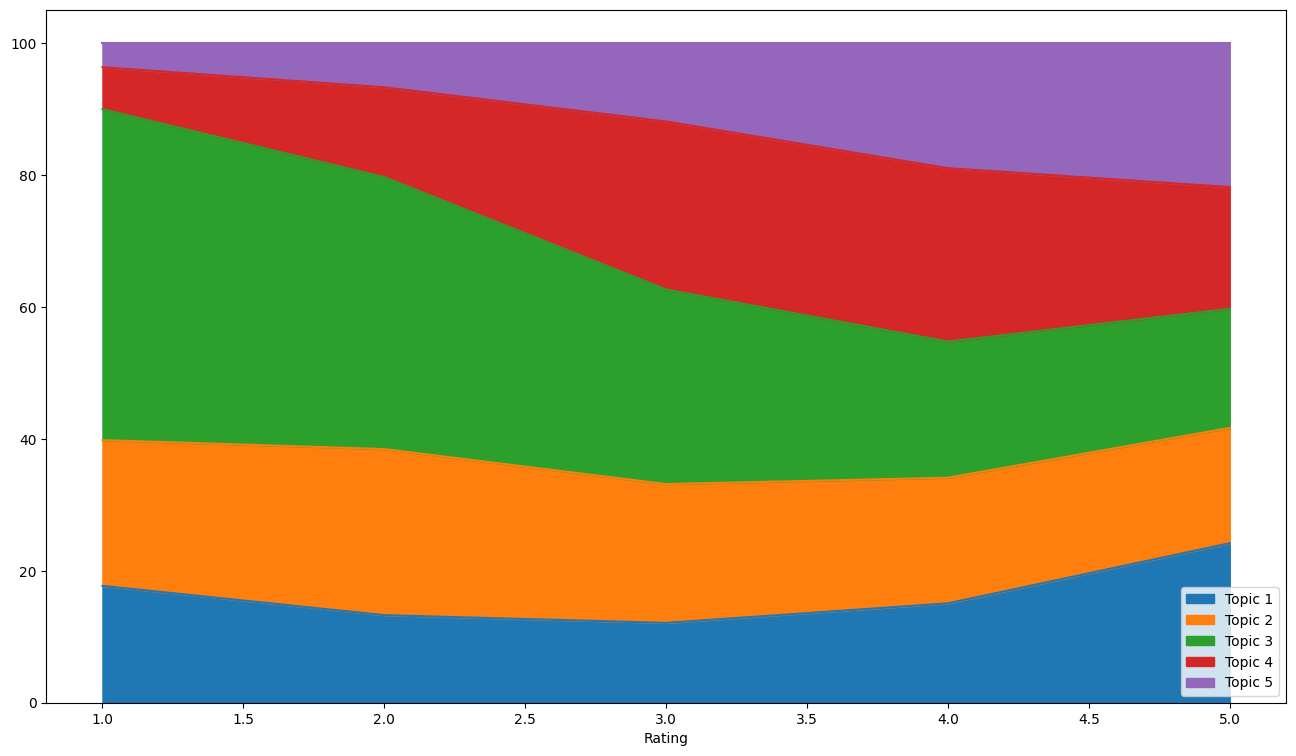

In [37]:
df_Rating = pd.DataFrame(Rating_data, columns=["Rating"] + topic_names).set_index("Rating")
df_Rating.plot.area(figsize=(16, 9))
